## CSCI S-89 Introduction to Deep Learning
Harvard Summer School 2025

# Final Project:
# *Face Recognition with Deep Learning*

The goal of this project is to detect human faces in images and recognize who the faces belong to from a predefined group of people.

# Part IV: **Build, Train, and Evaluate Face Recognition Model**

## A. **Build a Convolutional Newral Network from scratch**

We will solve this problem as a **multi-class image classification problem**. Τhus, some choices for the model architecture and training setup are pretty clear and standard:<br>
*   We will build a **Convolutional Newral Network**.
*   Our output layer will be Dense and have 20 neurons, for the **20 classes/people** in our dataset.
*   We will use **softmax** for activation function in the output layer.
*   We will use **Categorical Crossentropy** for loss function.
*   We will use **Adam** optimizer.

Now, building on top of that, I'm thinking I shouldn't use more than **5 convolutional layers** to prevent overfitting, since our dataset is relatively small (20 classes/people * 80 images each = 1600 total images for both training and validation).<br>
I will use **MaxPooling** after every convolutional layer, and I will use **BatchNormalization**, **Dropout** layers, and **L2** for regularization.<br>
I will **gradually increase the number of filters** across the convolutional layers, and slightly reduce it in the final layer, to ease transition into the dense layers.<br>
I will use **GlobalAveragePooling2D()** instead of Flatten() to reduce overfitting.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

# Build model.
model = models.Sequential()

# 1st block.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# 2nd block.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# 3rd block.
model.add(layers.Conv2D(96, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# 4th block.
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# 5th block.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(20,activation='softmax')) # multiclass classification problem with 20 classes

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         5,140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,612 (1.08 MB)

 Trainable params: 281,844 (1.08 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
# Compile model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train model.
history = model.fit(
      train_ds_scaled_aug,
      epochs=150,
      validation_data=val_ds_scaled)

Epoch 1/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 538ms/step - accuracy: 0.1442 - loss: 2.9629 - val_accuracy: 0.0500 - val_loss: 3.2633
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 520ms/step - accuracy: 0.2426 - loss: 2.4856 - val_accuracy: 0.0437 - val_loss: 3.6287
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 504ms/step - accuracy: 0.2852 - loss: 2.3243 - val_accuracy: 0.0562 - val_loss: 3.7184
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 511ms/step - accuracy: 0.3502 - loss: 2.1855 - val_accuracy: 0.0594 - val_loss: 3.6906
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 506ms/step - accuracy: 0.3686 - loss: 2.0681 - val_accuracy: 0.0562 - val_loss: 3.8483
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 512ms/step - accuracy: 0.3655 - loss: 2.0262 - val_accuracy: 0.1031 - val_loss: 3.6802
Epoch 7/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 504ms/step - accuracy: 0.3986 - loss: 1.9324 - val_accuracy: 0.1156 - val_loss: 3.4473
Epoch 8/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 505ms/step - accuracy: 0.4278 - loss: 1.8841 - 

In [ ]:
# Save model after training.
model.save('/content/drive/MyDrive/CSCI S-89 Deep Learning/FinalProject/cnn_model.keras')

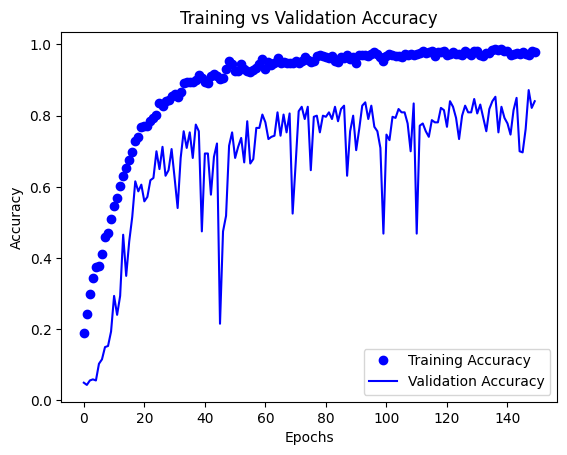

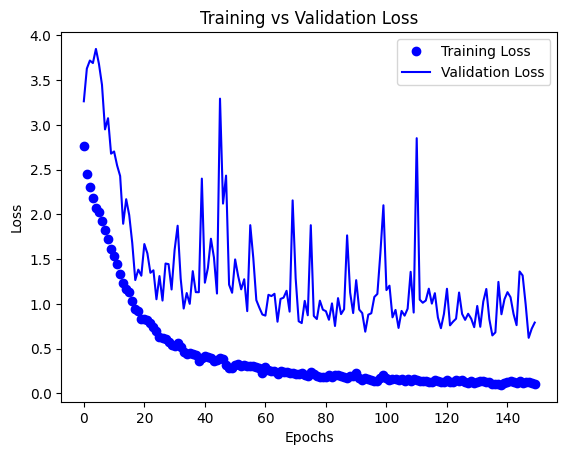

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss per epoch.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title(f'Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title(f'Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(val_ds_scaled)
print(f'Validation Accuracy: {val_acc:.2f}')
print(f'Validation Loss: {val_loss:.2f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8362 - loss: 0.8225
Validation Accuracy: 0.84
Validation Loss: 0.79


I'm not very happy with those results:<br>
*   The **training accuracy** converges very close to **1**.
*   The **training loss** converges very close to **0**.
*   There is **high fluctuation** and a lot of **spikes** in the **validation** curves.
*   There is a significant **distance** between the **training** and the **validation** curves, which most importantly is **not stable**.<br>

These remarks suggest **overfitting**. The model does learn, but also overfits and possibly memorizing instead of generalizing to unseen data. This is not unexpected given the **small size of the input data**, and especially the input validation dataset, which is not even augmented.

On a good note, **validation accuracy** is **84%**, but I'm not sure how reliable that is with all that fluctuation.

Let's display a confusion matrix heatmap for the validation dataset and see how the model performs across the classes.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step



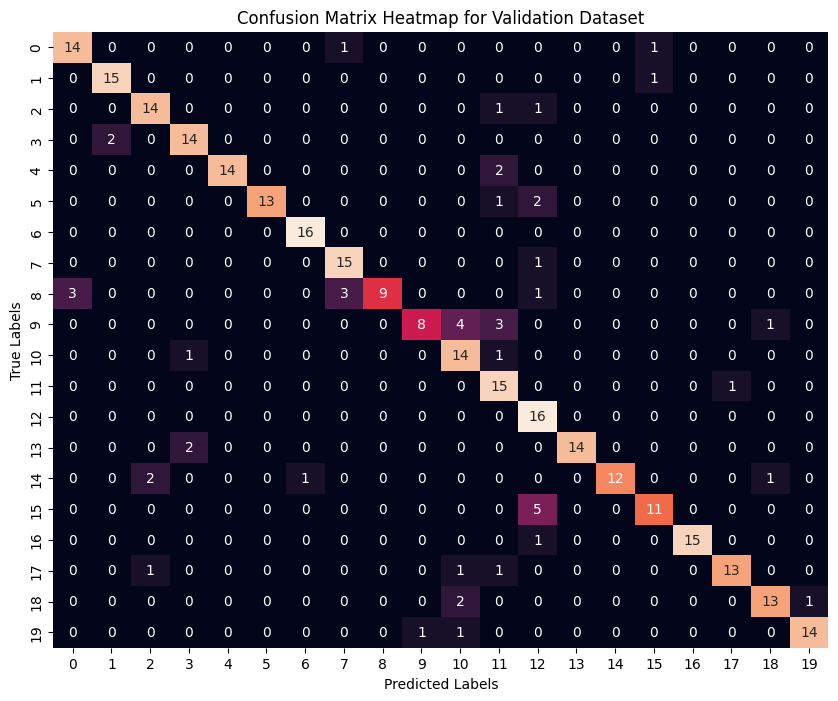

0: Alexandra Daddario
1: Anastasia
2: Andy Samberg
3: Billie Eilish
4: Brad Pitt
5: Camila Cabello
6: Christos
7: Claire Holt
8: Courtney Cox
9: Henry Cavill
10: Hrithik Roshan
11: Hugh Jackman
12: Jessica Alba
13: Kyriaki
14: Mitsos
15: Natalie Portman
16: Priyanka Chopra
17: Robert Downey Jr
18: Vijay Deverakonda
19: Zac Efron


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import confusion_matrix

# Get class names.
class_names = train_ds.class_names

# Get true labels and predicted labels for the validation dataset.
y_true = []
y_pred = []

# For all the images in the validation dataset...
for image, label in val_ds_scaled:
  pred = model.predict(image) # predict the label for the image
  y_true.extend(np.argmax(label.numpy(), axis=1))
  y_pred.extend(np.argmax(pred, axis=1))

# Compute the confusion matrix.
cm = confusion_matrix(y_true, y_pred)

print()
# Plot the confusion matrix.
plt.figure(figsize=(10, 8))
seaborn.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Validation Dataset')
plt.show()

# Show each index to which person it maps.
for index, name in enumerate(class_names):
  print(f'{index}: {name}')

All classes have a strong diagonal, meaning correct predictions for the most part. There are some mismatches, which are normal and expected due to facial similarities (like eye color, or facial hair for men). It seems that the model struggles to recognize Henry Cavill and mismatches him much with Hrithik Roshan and Hugh Jackman.

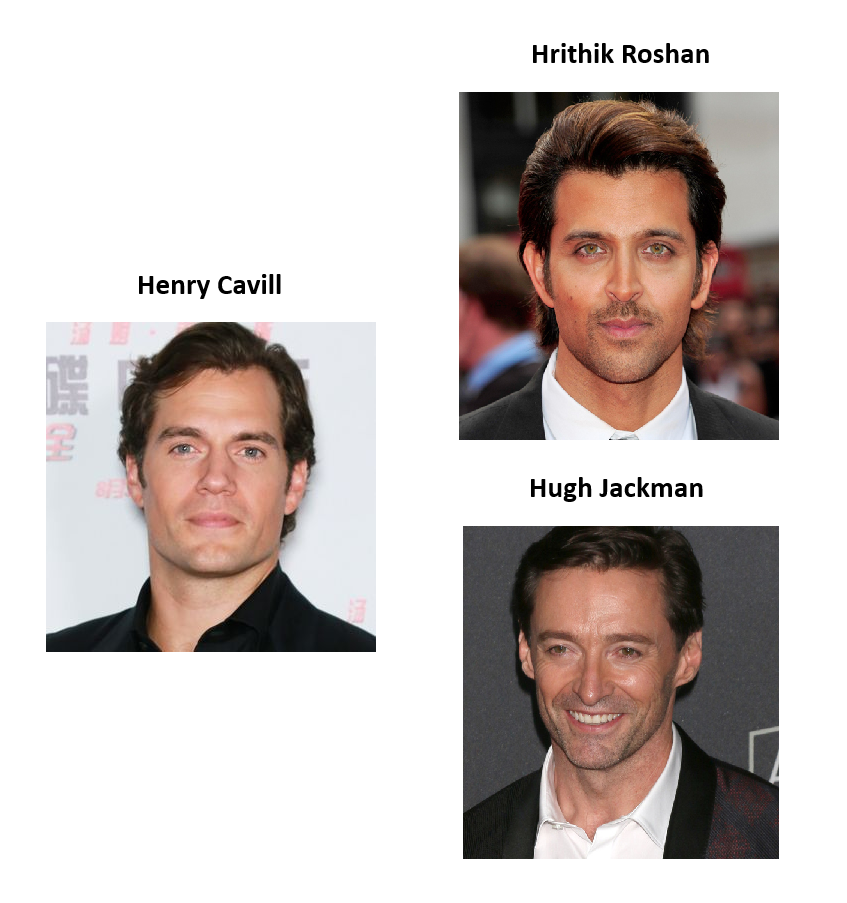

Let's now test our trained model on a separate dataset (test dataset). This dataset contains new images for our 20 people, different from the ones we used for training and validation. For the celebrities in the Kaggle dataset, I collected one additional photo per person from Google Images, ensuring they were different from the original Kaggle images, and for myself, my friends, and family, again I collected one additional photo per person.

In [ ]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load MTCNN face detector.
face_detector = MTCNN()

# Define the input image size for the model.
model_image_size = (224, 224)

# Get the folder with the test images.
test_dir = os.path.join(target_folder, 'test')

# Get people's names.
labels = train_ds.class_names

# For all test images.
for test_img in os.listdir(test_dir):
  # Take the image.
  image_path = os.path.join(test_dir, test_img)

  # Prepare image for MTCNN and OpenCV processing.
  img = cv2.imread(image_path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Detect faces.
  faces = face_detector.detect_faces(img_rgb)

  # For every face in the image...
  for face in faces:
    # Get coordinates of the face.
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y) # make sure coords are non negative

    face_img = img_rgb[y:y+h, x:x+w] # Crop the face out of the image.

    # Prepare the face for the model.
    face_resized = cv2.resize(face_img, model_image_size)
    face_array = np.expand_dims(face_resized / 255.0, axis=0)

    # Make prediction.
    pred = model.predict(face_array) # this returns probabilities of matching for all the classes in the dataset
    max_prob = np.max(pred)
    max_prob_index = np.argmax(pred)

    label = f'{labels[max_prob_index]} ({max_prob:.2f})'
    print(label)

    # Draw box and annotation for the face.
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

  # Display results.
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

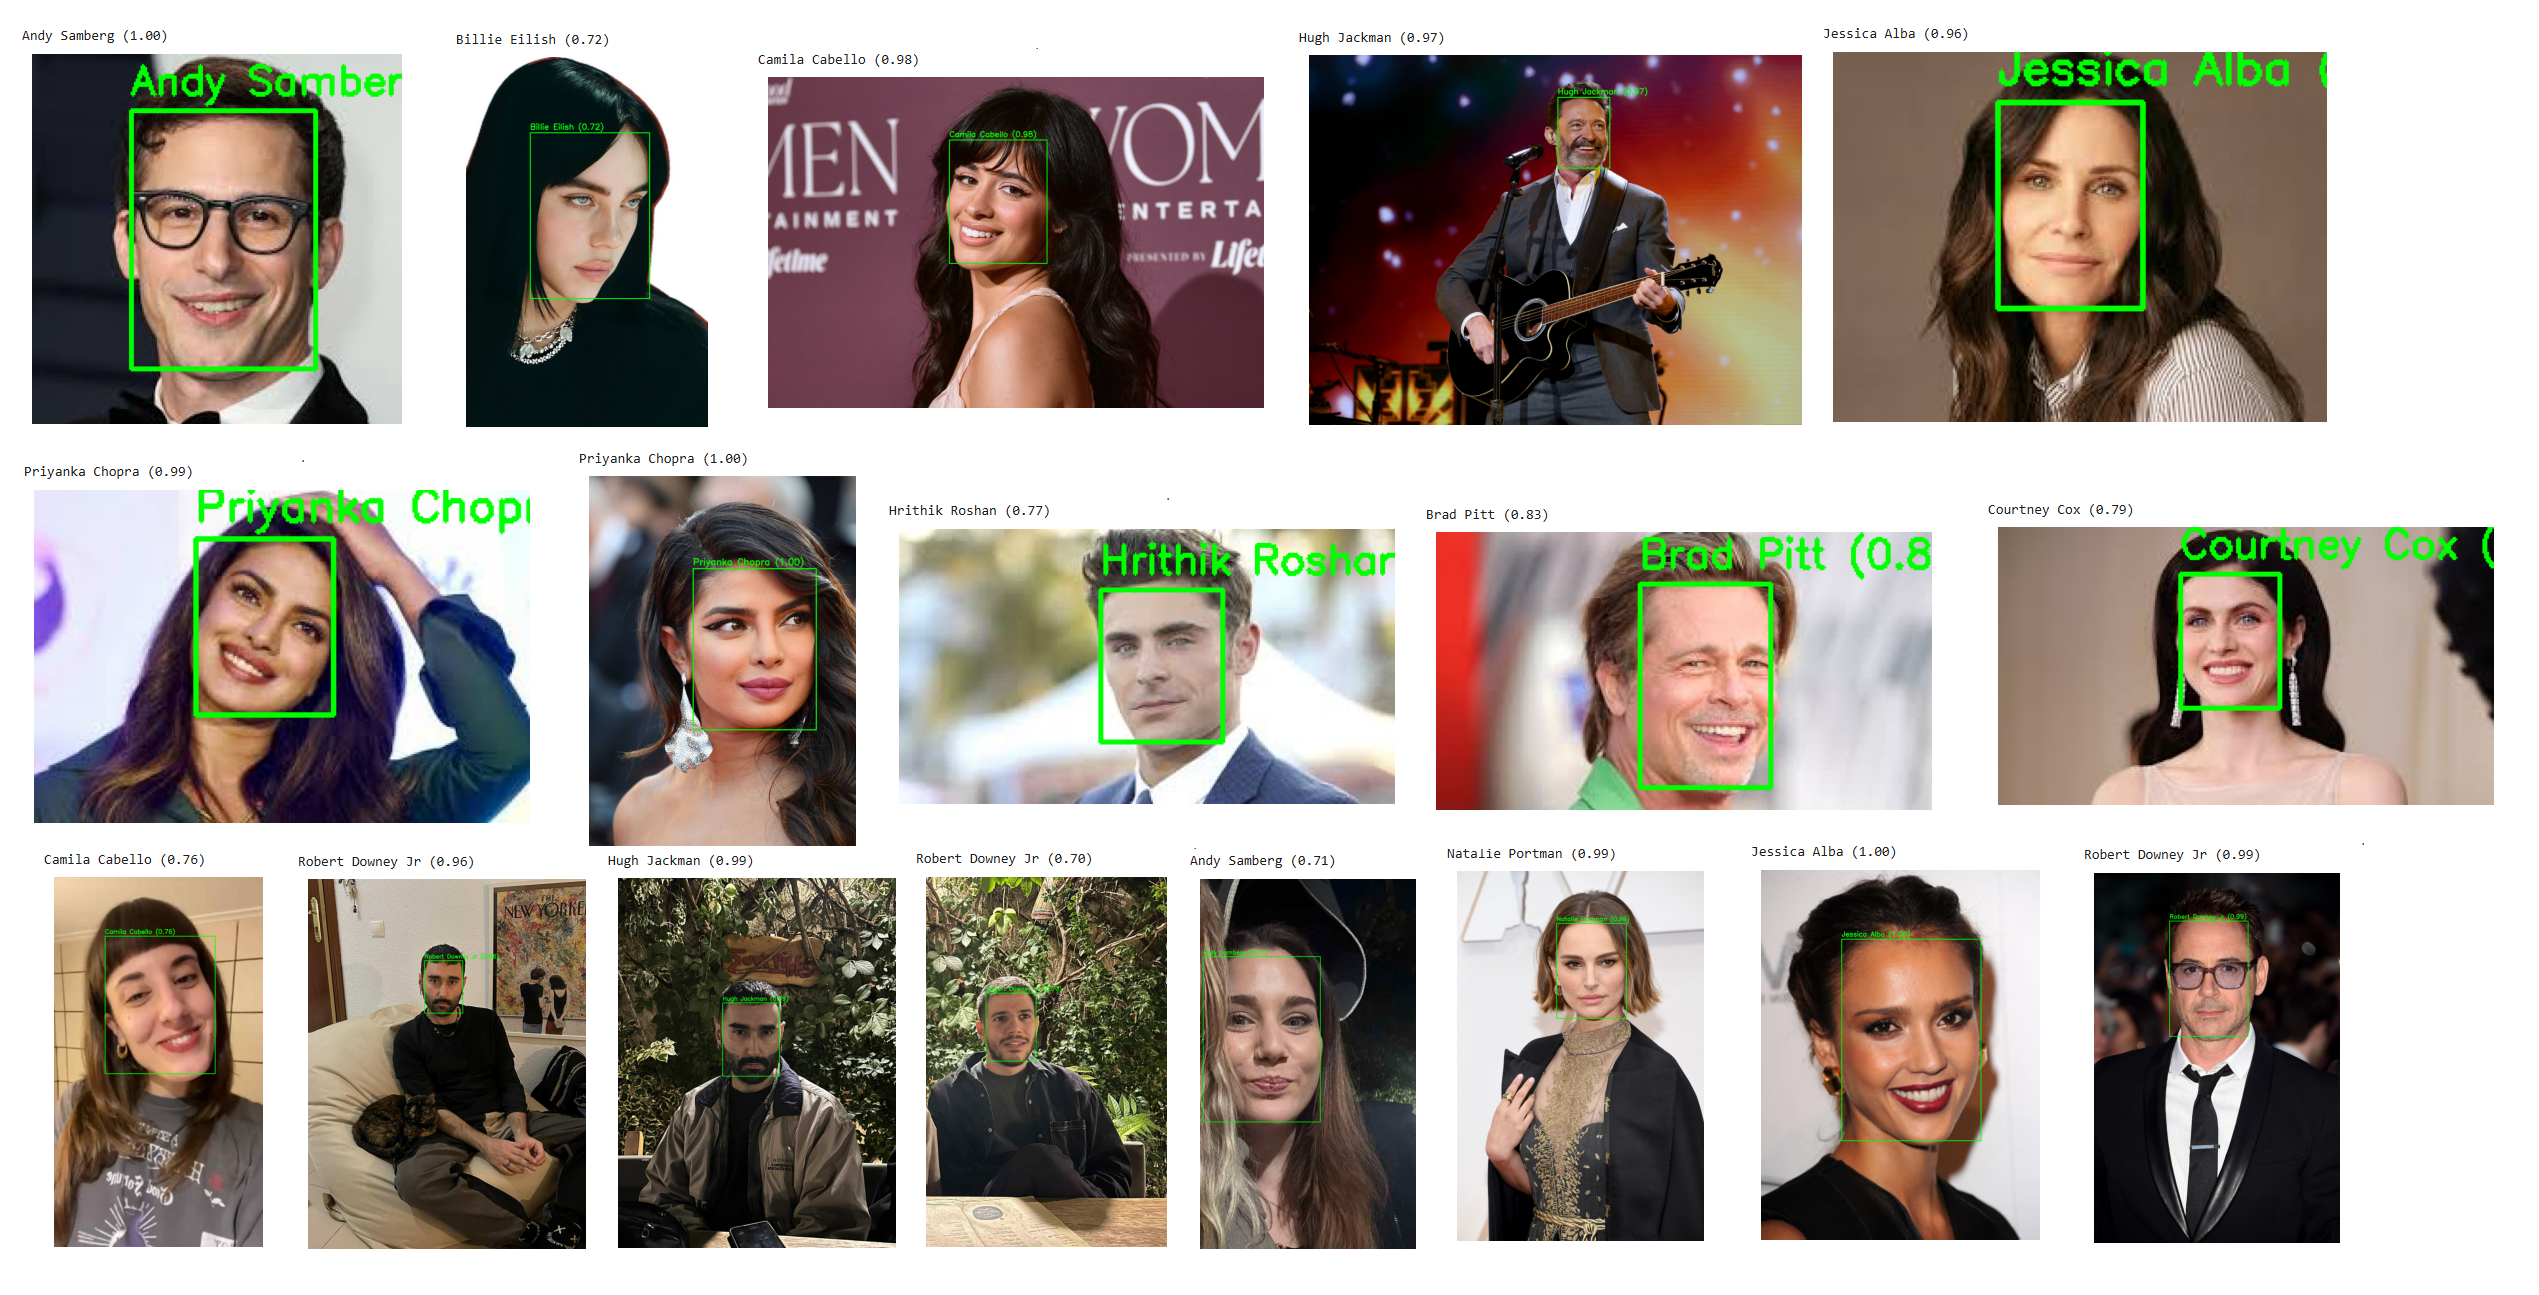

The model correctly classified 10/18 test images. This shows that it has learnt and can generalize to some extent beyond the training and validation data.<br>

Some of the incorrect predictions are somewhat understandable, as some people in the dataset share similar facial features.

However, a few mismatches don't really make sense, for example predicting Courtney Cox as Jessica Alba. This suggests that while the model has picked up on general facial structure and patterns, it still struggles to recognize some of the people in the dataset.